<a href="https://colab.research.google.com/github/ShreenathKR2000/programming-lecture/blob/main/Copy_of_Lab09_1_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dogs vs. Cats Classification

Select free T4 GPU in Runtime settings

## Download data

In [ ]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=12WhCCpKTWpeBztLegcoYx2gMo2KbaxDG

Downloading...
From (original): https://drive.google.com/uc?id=12WhCCpKTWpeBztLegcoYx2gMo2KbaxDG
From (redirected): https://drive.google.com/uc?id=12WhCCpKTWpeBztLegcoYx2gMo2KbaxDG&confirm=t&uuid=79d937ee-4008-4ca8-a744-2d204be67b0f
To: /content/dogs-vs-cats.zip
100% 852M/852M [00:12<00:00, 68.7MB/s]


In [ ]:
import zipfile

with zipfile.ZipFile('dogs-vs-cats.zip', 'r') as zip_file:
    zip_file.extractall('data')

with zipfile.ZipFile('data/train.zip', 'r') as zip_file:
    zip_file.extractall('data/')

In [ ]:
## Prepare load

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Paths
base_dir = 'data/train'
train_dir = 'data/train_split'
val_dir = 'data/val_split'

# Create directories
os.makedirs(os.path.join(train_dir, 'dogs'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'cats'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'dogs'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'cats'), exist_ok=True)

# Split data
filenames = os.listdir(base_dir)
train_files, val_files = train_test_split(filenames, test_size=0.2, random_state=42)

for file in train_files:
    if 'dog' in file:
        shutil.move(os.path.join(base_dir, file), os.path.join(train_dir, 'dogs', file))
    elif 'cat' in file:
        shutil.move(os.path.join(base_dir, file), os.path.join(train_dir, 'cats', file))

for file in val_files:
    if 'dog' in file:
        shutil.move(os.path.join(base_dir, file), os.path.join(val_dir, 'dogs', file))
    elif 'cat' in file:
        shutil.move(os.path.join(base_dir, file), os.path.join(val_dir, 'cats', file))

## Create data generators

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Load data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


## Create basic CNN classification model

In [ ]:
from tensorflow.keras import models, layers

# Build the model
model_basic = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_basic.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

## Train basic model

In [ ]:
history_model_basic = model_basic.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 68ms/step - accuracy: 0.5896 - loss: 0.6660 - val_accuracy: 0.7404 - val_loss: 0.5175
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.7611 - loss: 0.4936 - val_accuracy: 0.7588 - val_loss: 0.4918
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 66ms/step - accuracy: 0.8128 - loss: 0.4091 - val_accuracy: 0.8138 - val_loss: 0.4072
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/step - accuracy: 0.8620 - loss: 0.3198 - val_accuracy: 0.8248 - val_loss: 0.3960
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.8956 - loss: 0.2538 - val_accuracy: 0.8258 - val_loss: 0.4098
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.9367 - loss: 0.1608 - val_accuracy: 0.8140 - val_loss: 0.4887
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 66ms/step - accuracy: 0.9691 - loss: 0.0888 - val_accuracy: 0.8240 - val_loss: 0.5998
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.9853 - loss: 0.0453 - val_accurac

## Plot accuracy and loss for Baseline Model

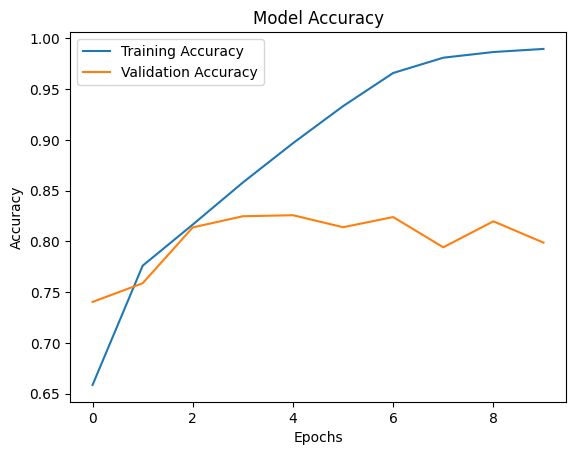

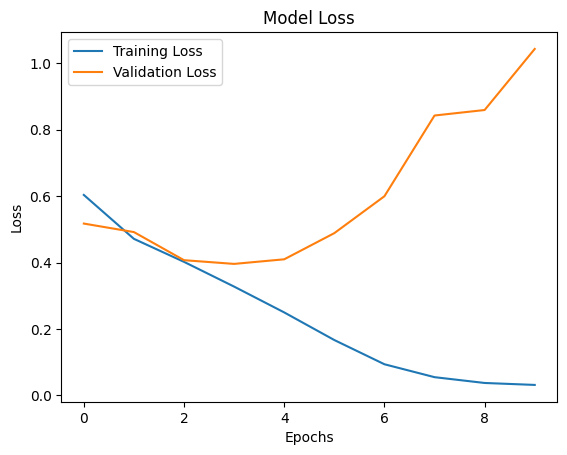

In [ ]:
plt.plot(history_model_basic.history['accuracy'], label='Training Accuracy')
plt.plot(history_model_basic.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_model_basic.history['loss'], label='Training Loss')
plt.plot(history_model_basic.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


##Train basic Dropout Regularization Model

In [ ]:
from tensorflow.keras import regularizers

model_dropout = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_dropout = model_dropout.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 61ms/step - accuracy: 0.5980 - loss: 0.6590 - val_accuracy: 0.7040 - val_loss: 0.5596
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.7436 - loss: 0.5225 - val_accuracy: 0.7934 - val_loss: 0.4552
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.7872 - loss: 0.4522 - val_accuracy: 0.8024 - val_loss: 0.4329
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.8356 - loss: 0.3708 - val_accuracy: 0.8094 - val_loss: 0.4240
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.8685 - loss: 0.3068 - val_accuracy: 0.8362 - val_loss: 0.3831
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 62ms/step - accuracy: 0.9005 - loss: 0.2378 - val_accuracy: 0.8390 - val_loss: 0.4098
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 60ms/step - accuracy: 0.9257 - loss: 0.1882 - val_accuracy: 0.8452 - val_loss: 0.4053
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.9427 - loss: 0.1497 - 

## Plot accuracy and loss for Dropout Regularization Model

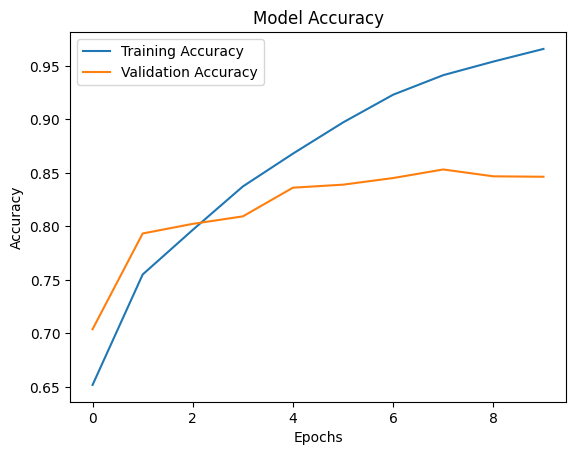

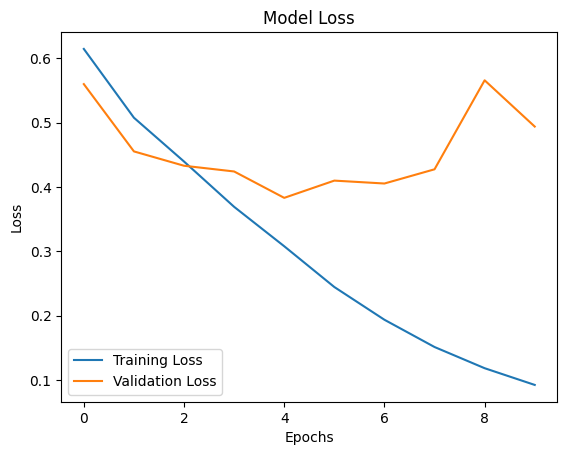

In [ ]:
plt.plot(history_dropout.history['accuracy'], label='Training Accuracy')
plt.plot(history_dropout.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_dropout.history['loss'], label='Training Loss')
plt.plot(history_dropout.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


##Train L2 Weight Regularization

In [ ]:
model_l2 = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation='sigmoid')
])

model_l2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_l2 = model_l2.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 64ms/step - accuracy: 0.5639 - loss: 0.8144 - val_accuracy: 0.7178 - val_loss: 0.5969
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.7202 - loss: 0.5911 - val_accuracy: 0.7436 - val_loss: 0.5562
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.7508 - loss: 0.5443 - val_accuracy: 0.7688 - val_loss: 0.5265
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.7658 - loss: 0.5246 - val_accuracy: 0.7844 - val_loss: 0.5060
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 60ms/step - accuracy: 0.7799 - loss: 0.5066 - val_accuracy: 0.7744 - val_loss: 0.5221
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 60ms/step - accuracy: 0.7938 - loss: 0.4879 - val_accuracy: 0.7894 - val_loss: 0.4942
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.8114 - loss: 0.4631 - val_accuracy: 0.7884 - val_loss: 0.5057
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.8253 - loss: 0.4515 - 

## Plot accuracy and loss and other results for L2 Weight Regularization

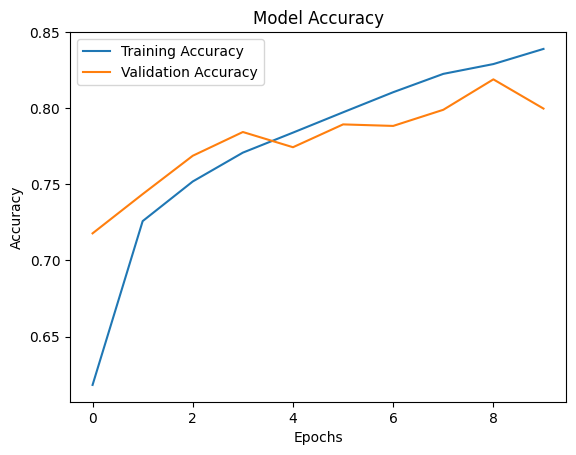

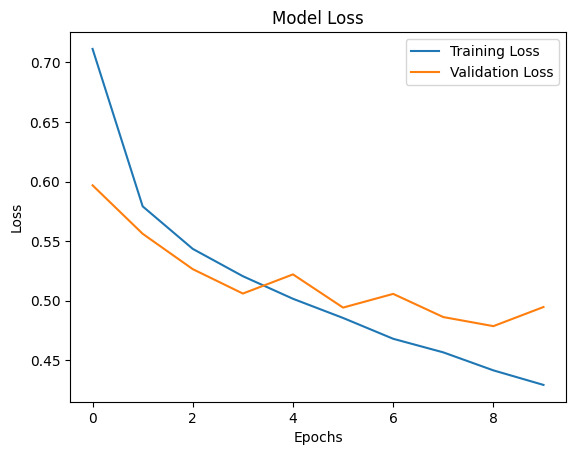

In [ ]:
plt.plot(history_l2.history['accuracy'], label='Training Accuracy')
plt.plot(history_l2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_l2.history['loss'], label='Training Loss')
plt.plot(history_l2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


##Train Combined Dropout and L2 Model (Dropout 0.3, L2 0.001)

In [ ]:
from tensorflow.keras import regularizers

# Model 1: Dropout 0.3, L2 0.001
model_combo_1 = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model_combo_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_combo_1 = model_combo_1.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 65ms/step - accuracy: 0.5053 - loss: 0.8071 - val_accuracy: 0.5880 - val_loss: 0.6908
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.5790 - loss: 0.6841 - val_accuracy: 0.6020 - val_loss: 0.6632
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.6099 - loss: 0.6555 - val_accuracy: 0.6794 - val_loss: 0.6238
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.6561 - loss: 0.6324 - val_accuracy: 0.6864 - val_loss: 0.5957
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.6862 - loss: 0.6076 - val_accuracy: 0.7076 - val_loss: 0.5947
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.6776 - loss: 0.6058 - val_accuracy: 0.7144 - val_loss: 0.5792
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.6862 - loss: 0.5950 - val_accuracy: 0.6976 - val_loss: 0.5816
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.6995 - loss: 0.5894 - 

##Train Combined Dropout and L2 Model (Dropout 0.5, L2 0.0005)

In [ ]:
from tensorflow.keras import regularizers
# Model 2: Dropout 0.5, L2 0.0005
model_combo_2 = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.0005)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.0005)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.0005)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0005)),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model_combo_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_combo_2 = model_combo_2.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 61ms/step - accuracy: 0.5546 - loss: 0.7582 - val_accuracy: 0.6908 - val_loss: 0.6128
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.7067 - loss: 0.5949 - val_accuracy: 0.7494 - val_loss: 0.5429
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 66ms/step - accuracy: 0.7350 - loss: 0.5601 - val_accuracy: 0.7644 - val_loss: 0.5273
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.7650 - loss: 0.5239 - val_accuracy: 0.7868 - val_loss: 0.4975
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 60ms/step - accuracy: 0.7796 - loss: 0.5045 - val_accuracy: 0.7902 - val_loss: 0.4844
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.7927 - loss: 0.4921 - val_accuracy: 0.8148 - val_loss: 0.4476
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.8093 - loss: 0.4681 - val_accuracy: 0.8114 - val_loss: 0.4551
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.8222 - loss: 0.4537 - 

## Plot accuracy and loss for Combined Dropout and L2 Model (Combo 1 and Combo 2)

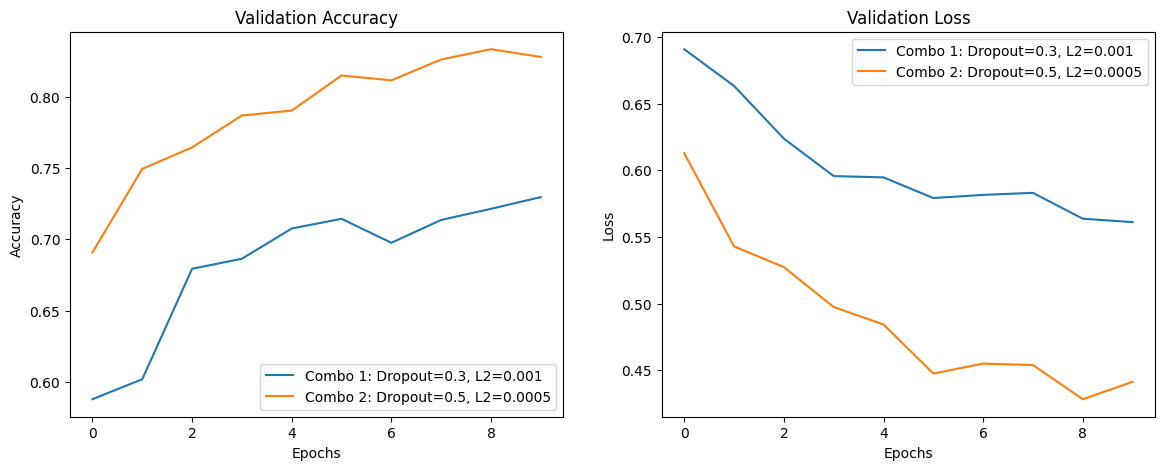

In [ ]:
plt.figure(figsize=(14, 5))

# Accuracy comparison
plt.subplot(1, 2, 1)
plt.plot(history_combo_1.history['val_accuracy'], label='Combo 1: Dropout=0.3, L2=0.001')
plt.plot(history_combo_2.history['val_accuracy'], label='Combo 2: Dropout=0.5, L2=0.0005')
plt.title("Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss comparison
plt.subplot(1, 2, 2)
plt.plot(history_combo_1.history['val_loss'], label='Combo 1: Dropout=0.3, L2=0.001')
plt.plot(history_combo_2.history['val_loss'], label='Combo 2: Dropout=0.5, L2=0.0005')
plt.title("Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

## Combined Dropout and L2 Model (Dropout 0.5, L2 0.0005) with Early Stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_combo2_es = model_combo_2.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=[early_stop]
)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.8466 - loss: 0.4161 - val_accuracy: 0.8382 - val_loss: 0.4293
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.8450 - loss: 0.4201 - val_accuracy: 0.8424 - val_loss: 0.4203
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.8530 - loss: 0.4088 - val_accuracy: 0.8502 - val_loss: 0.4125
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.8625 - loss: 0.3915 - val_accuracy: 0.8430 - val_loss: 0.4299
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.8682 - loss: 0.3892 - val_accuracy: 0.8406 - val_loss: 0.4345
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.8730 - loss: 0.3745 - val_accuracy: 0.8556 - val_loss: 0.4095
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 61ms/step - accuracy: 0.8764 - loss: 0.3694 - val_accuracy: 0.8498 - val_loss: 0.4167
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 61ms/step - accuracy: 0.8774 - loss: 0.3740 - 

## Plot for Combined Dropout and L2 Model (Dropout 0.5, L2 0.0005) with Early Stopping

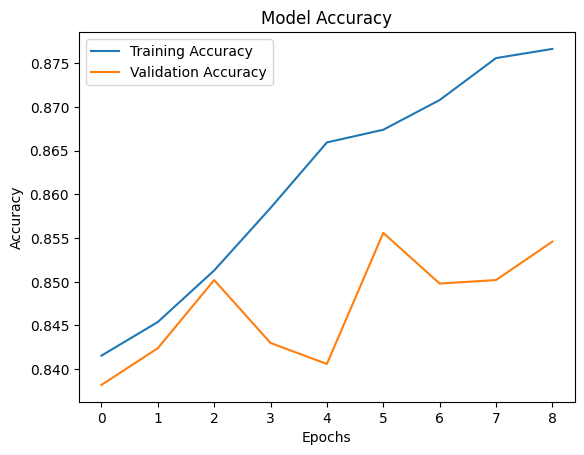

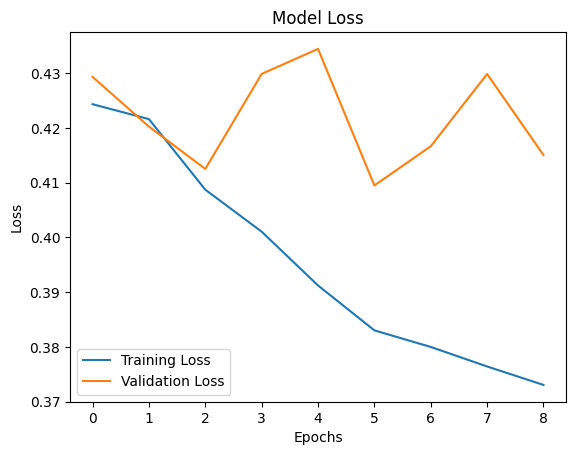

In [ ]:
plt.plot(history_combo2_es.history['accuracy'], label='Training Accuracy')
plt.plot(history_combo2_es.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_combo2_es.history['loss'], label='Training Loss')
plt.plot(history_combo2_es.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Adding Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator_aug = train_datagen_aug.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 20000 images belonging to 2 classes.


In [14]:
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

# Model 2 with data augmentation
model_combo_2_aug = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.0005)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.0005)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.0005)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0005)),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model_combo_2_aug.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_combo_2_aug = model_combo_2_aug.fit(
    train_generator_aug,
    epochs=30,
    validation_data=val_generator,
    callbacks=[early_stop]
)

Epoch 1/30
 10/625 ━━━━━━━━━━━━━━━━━━━━ 17:18 2s/step - accuracy: 0.5459 - loss: 1.0768

KeyboardInterrupt: 

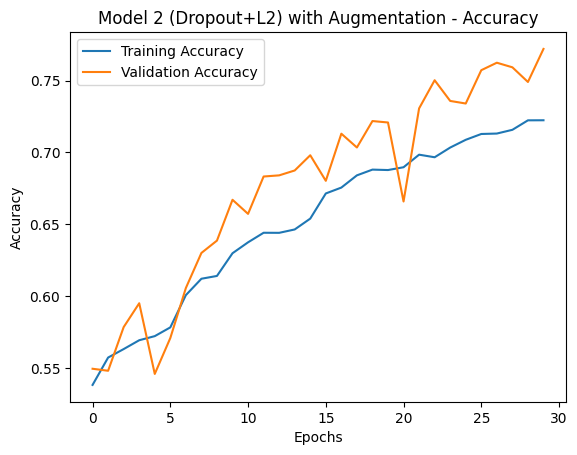

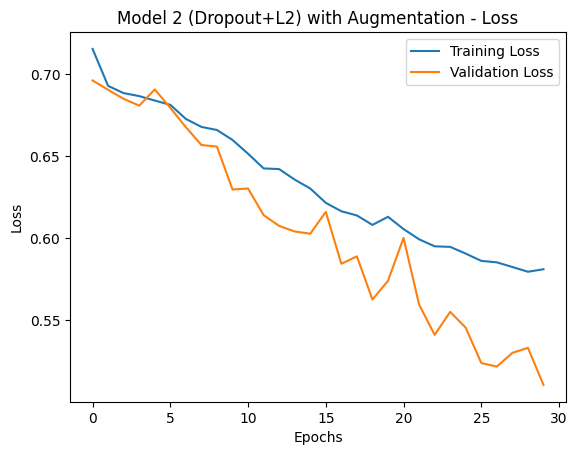

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_combo_2_aug.history['accuracy'], label='Training Accuracy')
plt.plot(history_combo_2_aug.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 2 (Dropout+L2) with Augmentation - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_combo_2_aug.history['loss'], label='Training Loss')
plt.plot(history_combo_2_aug.history['val_loss'], label='Validation Loss')
plt.title('Model 2 (Dropout+L2) with Augmentation - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Finalizing the results

In [ ]:
import pandas as pd
import numpy as np

def get_best_val_acc(history):
    return max(history.history['val_accuracy'])

def get_epochs_until_convergence(history, patience=3):
    val_losses = history.history['val_loss']
    best_loss = np.min(val_losses)
    # Approximate as first epoch where val_loss <= best_loss + epsilon for patience epochs
    for i in range(len(val_losses)):
        # Check if loss does not improve for 'patience' epochs after i
        if all(val_losses[j] >= val_losses[i] for j in range(i+1, min(i+1+patience, len(val_losses)))):
            return i + 1
    return len(val_losses)

summary_data = [
    ['None', 'No', 'No', get_best_val_acc(history_model_basic), get_epochs_until_convergence(history_model_basic)],
    ['Dropout 0.5', 'No', 'No', get_best_val_acc(history_dropout), get_epochs_until_convergence(history_dropout)],
    ['L2 0.001', 'No', 'No', get_best_val_acc(history_l2), get_epochs_until_convergence(history_l2)],
    ['Dropout 0.3 + L2 0.001', 'No', 'No', get_best_val_acc(history_combo_1), get_epochs_until_convergence(history_combo_1)],
    ['Dropout 0.5 + L2 0.0005', 'No', 'No', get_best_val_acc(history_combo_2), get_epochs_until_convergence(history_combo_2)],
    ['Dropout 0.5 + L2 0.0005', 'No', 'Yes', get_best_val_acc(history_combo2_es), get_epochs_until_convergence(history_combo2_es)],
    ['Dropout 0.5 + L2 0.0005', 'Yes', 'Yes', get_best_val_acc(history_combo_2_aug), get_epochs_until_convergence(history_combo_2_aug)],
]

df_summary = pd.DataFrame(summary_data, columns=['Regularization', 'Augmentation', 'Early Stopping', 'Val Accuracy', 'Epochs Until Convergence'])
print(df_summary)


            Regularization Augmentation Early Stopping  Val Accuracy  \
0                     None           No             No        0.8258   
1              Dropout 0.5           No             No        0.8532   
2                 L2 0.001           No             No        0.8190   
3   Dropout 0.3 + L2 0.001           No             No        0.7296   
4  Dropout 0.5 + L2 0.0005           No             No        0.8332   
5  Dropout 0.5 + L2 0.0005           No            Yes        0.8556   
6  Dropout 0.5 + L2 0.0005          Yes            Yes        0.7720   

   Epochs Until Convergence  
0                         4  
1                         5  
2                         9  
3                        10  
4                         9  
5                         6  
6                        30  


157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step


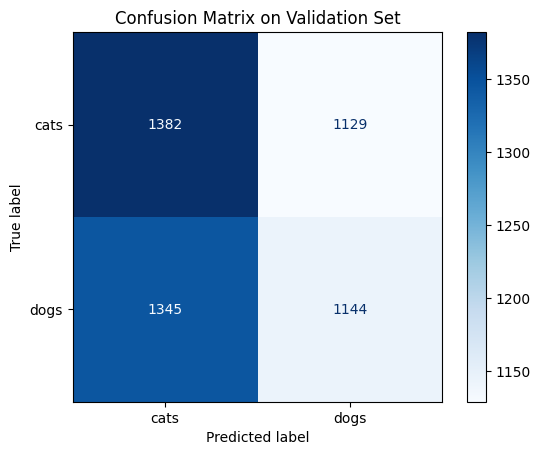

Confusion Matrix:
 [[1382 1129]
 [1345 1144]]


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


y_true = val_generator.classes


y_pred_probs = model_combo_2_aug.predict(val_generator)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()


cm = confusion_matrix(y_true, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(val_generator.class_indices.keys()))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix on Validation Set")
plt.show()

print("Confusion Matrix:\n", cm)


Total misclassified samples: 12495006


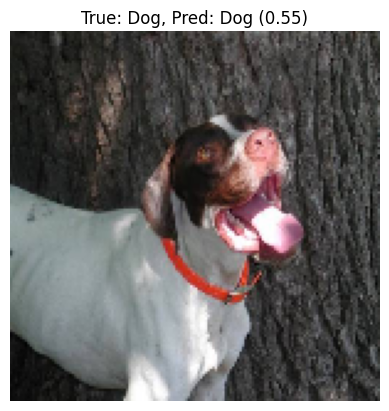

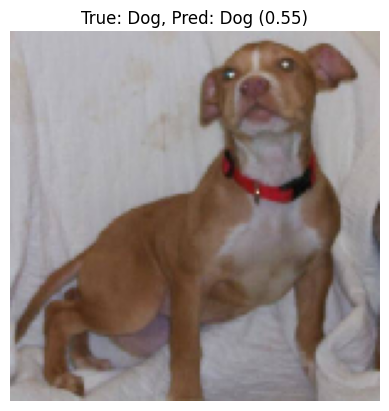

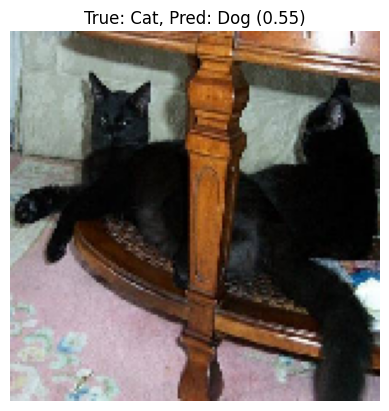

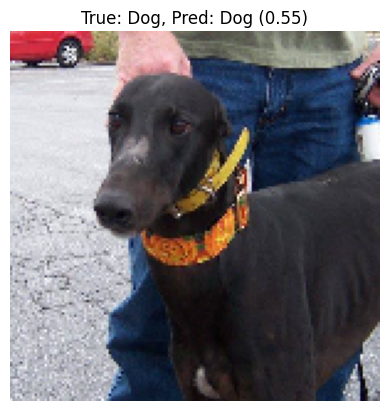

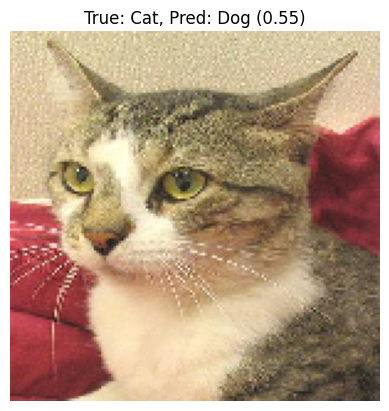

In [ ]:
misclassified_idx = np.where(y_pred != y_true)[0]
print(f"Total misclassified samples: {len(misclassified_idx)}")

def get_image_and_label_from_generator(generator, idx):
    batch_size = generator.batch_size
    batch_num = idx // batch_size
    idx_in_batch = idx % batch_size
    generator.reset()
    for i, (imgs, labels) in enumerate(generator):
        if i == batch_num:
            return imgs[idx_in_batch], labels[idx_in_batch]
        if i > batch_num:
            break
    return None, None

for i in range(min(5, len(misclassified_idx))):
    idx = misclassified_idx[i]
    img, label = get_image_and_label_from_generator(val_generator, idx)
    pred_class = "Dog" if y_pred[idx] == 1 else "Cat"
    true_class = "Dog" if label == 1 else "Cat"
    confidence = y_pred_probs[idx][0]
    plt.imshow(img)
    plt.title(f"True: {true_class}, Pred: {pred_class} ({confidence:.2f})")
    plt.axis('off')
    plt.show()


## part 2: making model ready for edge devices

In [ ]:
model_combo_2_aug.save("model_combo_2_aug.keras")



NameError: name 'model_combo_2_aug' is not defined

In [ ]:
import tensorflow as tf
import os


to TensorFlow Lite (TFLite)

In [ ]:

import tensorflow as tf

# Load model
model = tf.keras.models.load_model("model_combo_2_aug.keras")

# Default TFLite Conversion
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open("model_default.tflite", "wb") as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmp29trdbo6'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='input_layer_8')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  135351001889296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135351001879888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135352675731024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135352675732368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135352675731600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135352675741392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135352675732560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135352675740624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135352675740432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135352675739088: TensorSpec(shape=(), dtype=tf.resource, name=None)


Weight Quantization (INT8 Weights Only)

In [ ]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model_quant = converter.convert()

with open("model_weight_quant.tflite", "wb") as f:
    f.write(tflite_model_quant)


Saved artifact at '/tmp/tmpq2xc93cn'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='input_layer_8')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  135351001889296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135351001879888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135352675731024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135352675732368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135352675731600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135352675741392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135352675732560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135352675740624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135352675740432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135352675739088: TensorSpec(shape=(), dtype=tf.resource, name=None)


Float16 Quantization (FP16 Weights Only)

In [ ]:
converter.target_spec.supported_types = [tf.float16]
tflite_model_fp16 = converter.convert()

with open("model_fp16.tflite", "wb") as f:
    f.write(tflite_model_fp16)

Saved artifact at '/tmp/tmpkrosledd'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='input_layer_8')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  135351001889296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135351001879888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135352675731024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135352675732368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135352675731600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135352675741392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135352675732560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135352675740624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135352675740432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135352675739088: TensorSpec(shape=(), dtype=tf.resource, name=None)


Full Integer Quantization (INT8 Weights + Activations)

In [ ]:
def representative_dataset():
    for data in val_generator.take(100):
        # Use a few batches for calibration
        yield [data[0]]

converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.target_spec.supported_types = {tf.int8}
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8

tflite_model_int8 = converter.convert()

with open("model_int8.tflite", "wb") as f:
    f.write(tflite_model_int8)

NameError: name 'tf' is not defined

Comparison

In [15]:
import os

models = ["model_combo_2_aug.keras",
          "model_default.tflite",
          "model_weight_quant.tflite",
          "model_fp16.tflite",
          "model_int8.tflite"]

for m in models:
    size = os.path.getsize(m) / 1024
    print(f"{m}: {size:.2f} KB")

FileNotFoundError: [Errno 2] No such file or directory: 'model_combo_2_aug.keras'